<a href="https://colab.research.google.com/github/Adukemi/OASIS_INFOBYTE/blob/main/Project3_L1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 3, Level 1

# Data Cleaning

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('/content/AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [16]:
# Data Integrity
# Check for any invalid or inconsistent data
print("Data Integrity Check:")

print(df.isnull().sum())  # Checking for missing values

Data Integrity Check:
id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       48895
reviews_per_month                 48895
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [30]:
# Missing Data Handling

# Fill missing values in 'reviews_per_month' with the mean, and ensure the correct data type
df['reviews_per_month'] = df['reviews_per_month'].fillna(df['reviews_per_month'].mean())

# Fill missing values in 'last_review' with the most frequent value (mode)
df['last_review'] = df['last_review'].fillna(df['last_review'].mode()[0])
# Replace missing entries in 'name' with "Unknown"
df['name'] = df['name'].fillna("Unknown")

# Replace missing entries in 'host_name' with "Unknown Host"
df['host_name'] = df['host_name'].fillna("Unknown Host")

# Ensure no downcasting occurs implicitly
df = df.infer_objects()

# Check for missing values again
df.isnull().sum()

,0
id,0
name,0
host_id,0
host_name,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [ ]:
# Duplicate Removal: Identify and remove duplicates

df = df.drop_duplicates()
print("\nAfter Removing Duplicates:\n")
df.head()


After Removing Duplicates:



,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.210000,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.380000,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-06-23,1.373221,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.640000,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.100000,1,0


# Standardization

In [ ]:
#Standardize 'room_type' to lowercase
df['room_type'] = df['room_type'].str.lower()

# Price Standardization (if any formatting issue arises, i.e., if 'price' is a string or needs adjustment)
df['price'] = df['price'].astype(float)

# Standardization 'name'
df['name'] = df['name'].str.capitalize()


# Outlier Detection (example using IQR for 'price')
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
airb = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

print("\nAfter Outlier Removal (based on price):")
print(airb.head())

# Show the cleaned dataset
print("\n\n")
print("\nCleaned DataFrame:")

df.head()


After Outlier Removal (based on price):
     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit midtown castle     2845   
2  3647               The village of harlem....new york !     4632   
3  3831                   Cozy entire floor of brownstone     4869   
4  5022  Entire apt: spacious studio/loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     private room  149

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,private room,149.0,1,9,2018-10-19,0.210000,6,365
1,2595,Skylit midtown castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,entire home/apt,225.0,1,45,2019-05-21,0.380000,2,355
2,3647,The village of harlem....new york !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,private room,150.0,3,0,2019-06-23,1.373221,1,365
3,3831,Cozy entire floor of brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,entire home/apt,89.0,1,270,2019-07-05,4.640000,1,194
4,5022,Entire apt: spacious studio/loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,entire home/apt,80.0,10,9,2018-11-19,0.100000,1,0


In [ ]:
# Display the first 5 rows of the updated DataFrame
#df.head(5)

# Display the distinct values in the 'neighbourhood_group' column
print("Distinct Neighbourhood Groups:", df.neighbourhood_group.unique())

# Count and display the number of unique values in the 'neighbourhood' column
print("\nNumber of Unique Neighbourhoods:", len(df.neighbourhood.unique()))

# Display the distinct values in the 'room_type' column
print("\nDistinct Room Types:", df.room_type.unique())

# Find and display the maximum value in the 'calculated_host_listings_count' column
max_host_listings = df.calculated_host_listings_count.max()
print("\nMaximum Host Listings Count:", max_host_listings)

Distinct Neighbourhood Groups: ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']

Number of Unique Neighbourhoods: 221

Distinct Room Types: ['private room' 'entire home/apt' 'shared room']

Maximum Host Listings Count: 327


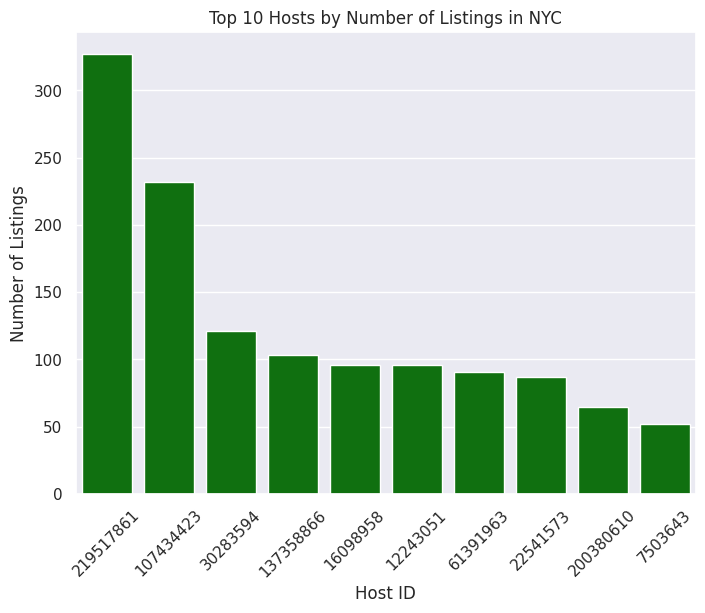

In [ ]:
# Counting the number of listings per host: Limiting to top 10 hosts for better visualization
top_host = df.host_id.value_counts().head(10)

# Converting the Series to a DataFrame
top_host_df = pd.DataFrame(top_host).reset_index()

# Renaming columns for clarity
top_host_df.columns = ['host_id', 'count']

# Sorting the DataFrame in descending order based on 'count'
top_host_df.sort_values(by='count', ascending=False, inplace=True)

# Visualizations
sns.set(rc={'figure.figsize':(8,6)})
sns.set_style('darkgrid')

# Plotting the barplot with a different color
sns.barplot(x="host_id", y="count", data=top_host_df, color='green', order=top_host_df['host_id'])
plt.title('Top 10 Hosts by Number of Listings in NYC')
plt.ylabel('Number of Listings')
plt.xlabel('Host ID')
plt.xticks(rotation=45)
plt.show()

<ipython-input-45-77732bd786db>:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  viz_2 = sns.violinplot(data=sub_6, x='neighbourhood_group', y='price', palette='Purples')


Text(0.5, 1.0, 'Density and Distribution of Prices for Each Neighbourhood Group')

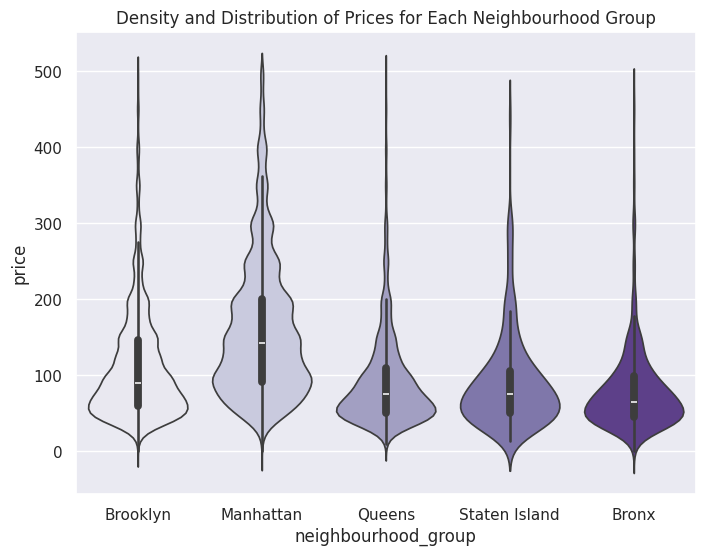

In [ ]:
# Let's analyze the neighborhoods: 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island', and 'Bronx'

# Brooklyn
sub_1 = df.loc[df['neighbourhood_group'] == 'Brooklyn']
price_sub1 = sub_1[['price']]

# Manhattan
sub_2 = df.loc[df['neighbourhood_group'] == 'Manhattan']
price_sub2 = sub_2[['price']]

# Queens
sub_3 = df.loc[df['neighbourhood_group'] == 'Queens']
price_sub3 = sub_3[['price']]

# Staten Island
sub_4 = df.loc[df['neighbourhood_group'] == 'Staten Island']
price_sub4 = sub_4[['price']]

# Bronx
sub_5 = df.loc[df['neighbourhood_group'] == 'Bronx']
price_sub5 = sub_5[['price']]

# Combine all price DataFrames into a list
price_list_by_n = [price_sub1, price_sub2, price_sub3, price_sub4, price_sub5]

# Initialize an empty list to store statistics
p_l_b_n_2 = []

# List of neighborhood groups
nei_list = ['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']

# Calculate statistics for each neighborhood and append to the list
for x in price_list_by_n:
    i = x.describe(percentiles=[.25, .50, .75])
    i = i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index': 'Stats'}, inplace=True)
    p_l_b_n_2.append(i)

# Rename the price column to the corresponding neighborhood name
for idx, name in enumerate(nei_list):
    p_l_b_n_2[idx].rename(columns={'price': name}, inplace=True)

# Finalize the DataFrame for display
stat_df = [df.set_index('Stats') for df in p_l_b_n_2]
stat_df = stat_df[0].join(stat_df[1:])
stat_df

# Create a sub-dataframe excluding extreme values (price < 500)
sub_6 = df[df.price < 500]

# Visualize the density and distribution of prices using a violin plot
viz_2 = sns.violinplot(data=sub_6, x='neighbourhood_group', y='price', palette='Purples')
viz_2.set_title('Density and Distribution of Prices for Each Neighbourhood Group')

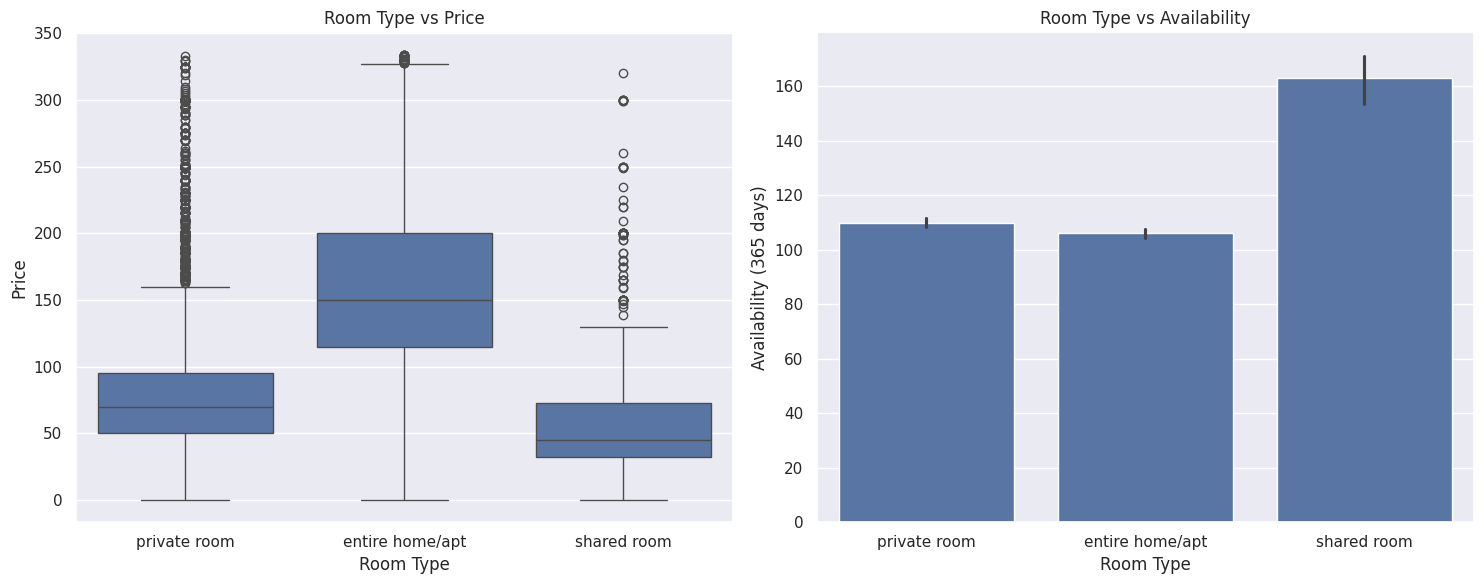

In [ ]:
# Create a figure and a set of subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Boxplot for room_type vs price
sns.boxplot(x='room_type', y='price', data=airb, ax=ax[0])
ax[0].set_title('Room Type vs Price')
ax[0].set_xlabel('Room Type')
ax[0].set_ylabel('Price')

# Plot 2: Scatter plot for room_type vs availability_365
sns.barplot(x='room_type', y='availability_365', data=airb, ax=ax[1])
ax[1].set_title('Room Type vs Availability')
ax[1].set_xlabel('Room Type')
ax[1].set_ylabel('Availability (365 days)')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

# Conclusion

In this project, we effectively resolved critical issues within the dataset, including missing values, duplicates, inconsistent formatting, and outliers. Missing data was addressed through imputation or removal to ensure completeness. Duplicate entries were identified and eliminated to uphold data integrity. Categorical and numerical values were standardized for uniformity, and outliers were identified and managed using statistical techniques to avoid skewing the analysis. As a result, the dataset is now clean, consistent, and well-prepared for further analysis or modeling, offering a reliable foundation for accurate, data-driven decision-making.






